#### Activating Environment

In [1]:
using Pkg; Pkg.activate("2023autodiff"); Pkg.instantiate()

  Activating project at `~/SynologyDrive/mydrivegeofisika_adir/Riset/2023_Autodiff_for_MASW/gamasw_julia/2023autodiff`


#### Load necessary modules and files

In [37]:
using Plots,ForwardDiff,LinearAlgebra,LaTeXStrings,Interpolations,BenchmarkTools,DelimitedFiles
pyplot()
include("forward_model.jl"); include("inversion.jl")
BenchmarkTools.DEFAULT_PARAMETERS.samples = 50
BenchmarkTools.DEFAULT_PARAMETERS.seconds = 60;

#### Creating synthetic models

##### Model 1: Two-layers model

On the example below, we create two-layers model.

In [45]:
Vp1 = [800.0,1500.0]                    # P-wave velocity
Vs1 = [500.0,800.0]                     # S-wave velocity
ρ1 = [1800.0,2400.0]                    # Density
d1 = [50.0,50.0]                        # Layer thickness
depth1 = cumsum(d1,dims=1).-d1[1]       # layer depth

fmin = 1.0                              # minimum frequency
fmax = 10.0                             # maximum frequency
cmin = 300.0                            # minimum phase velocity
cmax = 1200.0                           # maximum phase velocity

df = 0.25                               # frequency step
dc = 5.0                                # phase velocity step
f_array = range(fmin,fmax+df,step=df)   # frequency array
c_array = range(cmin,cmax+dc,step=dc)   # phase velocity array
@benchmark (c1,f1) = calculate_dc_obs(Vp1, Vs1, ρ1, d1, fmin, fmax, cmin, cmax,df=df,dc=dc,maxmode=1) # calculating synthetic dispersion curve

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  84.678 ms … 125.390 ms  ┊ GC (min … max): 5.14% … 4.35%
 Time  (median):     87.157 ms               ┊ GC (median):    5.39%
 Time  (mean ± σ):   88.636 ms ±   6.003 ms  ┊ GC (mean ± σ):  5.58% ± 1.09%

   █▆▅  ▃                                                       
  ████▅██▄▄▅▄▁▅▄▁▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  84.7 ms         Histogram: frequency by time          125 ms <

 Memory estimate: 46.03 MiB, allocs estimate: 1627175.

##### Model 2: Linearly increasing velocity model

In [46]:
step = 2
m = (1500.0 - 800.0)/(50.0)
cx= 800.0
Vp2 = [m*i+cx for i in range(0.0,50.0,step=step)];  # P-wave velocity

m = (800.0 - 500.0)/(50.0)
cx= 500.0
Vs2 = [m*i+cx for i in range(0.0,50.0,step=step)];  # S-wave velocity

m = (2400.0 - 1800.0)/(50.0)
cx= 1800.0
ρ2 = [m*i+cx for i in range(0.0,50.0,step=step)];   # density

m = (50.0 - 0.0)/(50.0)
cx= 0.0
d2 = [step for i in range(0.0,50.0,step=step)];   # layer thickness

depth2 = [m*i+cx for i in range(0.0,50.0,step=step)];   # layer depth
@benchmark (c2,f2) = calculate_dc_obs(Vp2, Vs2, ρ2, d2, fmin, fmax, cmin, cmax,df=df,dc=dc,maxmode=1)

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  631.895 ms … 698.653 ms  ┊ GC (min … max): 4.58% … 5.12%
 Time  (median):     648.776 ms               ┊ GC (median):    4.64%
 Time  (mean ± σ):   652.211 ms ±  14.795 ms  ┊ GC (mean ± σ):  4.65% ± 0.22%

         ▅█ ▂      ▅      ▂             ▂                        
  ▅▁▅▅▅▁▅████▁██▅█▅█▁█▅▁▁███▁▁▅▁▁▅▁▁▅▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▁▁▁▁▁▅ ▁
  632 ms           Histogram: frequency by time          699 ms <

 Memory estimate: 446.95 MiB, allocs estimate: 24475581.

##### Model 3: Low Velocity Layer (LVL) Model

In [47]:
Vp3 = [3050.0,1800.0,2150.0,2800.0] # P-wave velocity
Vs3 = [800.0,485.0,603.0,740.0]  # S-wave velocity
ρ3 = [2110.0,1960.0,2020.0,2090.0] # densitas
d3 = [14.0,15.0,16.0,16.0]     # layer thickness
depth3 = cumsum(d3,dims=1).-d3[1]

f_array = range(fmin,fmax+df,step=df)
c_array = range(cmin,cmax+dc,step=dc)
@benchmark (c3,f3) = calculate_dc_obs(Vp3, Vs3, ρ3, d3, fmin, fmax, cmin, cmax,df=df,dc=dc,maxmode=1)

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  126.645 ms … 141.921 ms  ┊ GC (min … max): 2.81% … 2.69%
 Time  (median):     131.983 ms               ┊ GC (median):    5.77%
 Time  (mean ± σ):   132.082 ms ±   2.431 ms  ┊ GC (mean ± σ):  5.55% ± 1.01%

                   █  ▃▃                                         
  ▅▁▁▄▁▁▁▄▁▄▁▁▁▁▁▅▄█▄▁██▇▄█▅▅▁▅▄▁▄▁▁▁▄▁▄▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  127 ms           Histogram: frequency by time          142 ms <

 Memory estimate: 82.41 MiB, allocs estimate: 3592643.

#### Displaying all the models

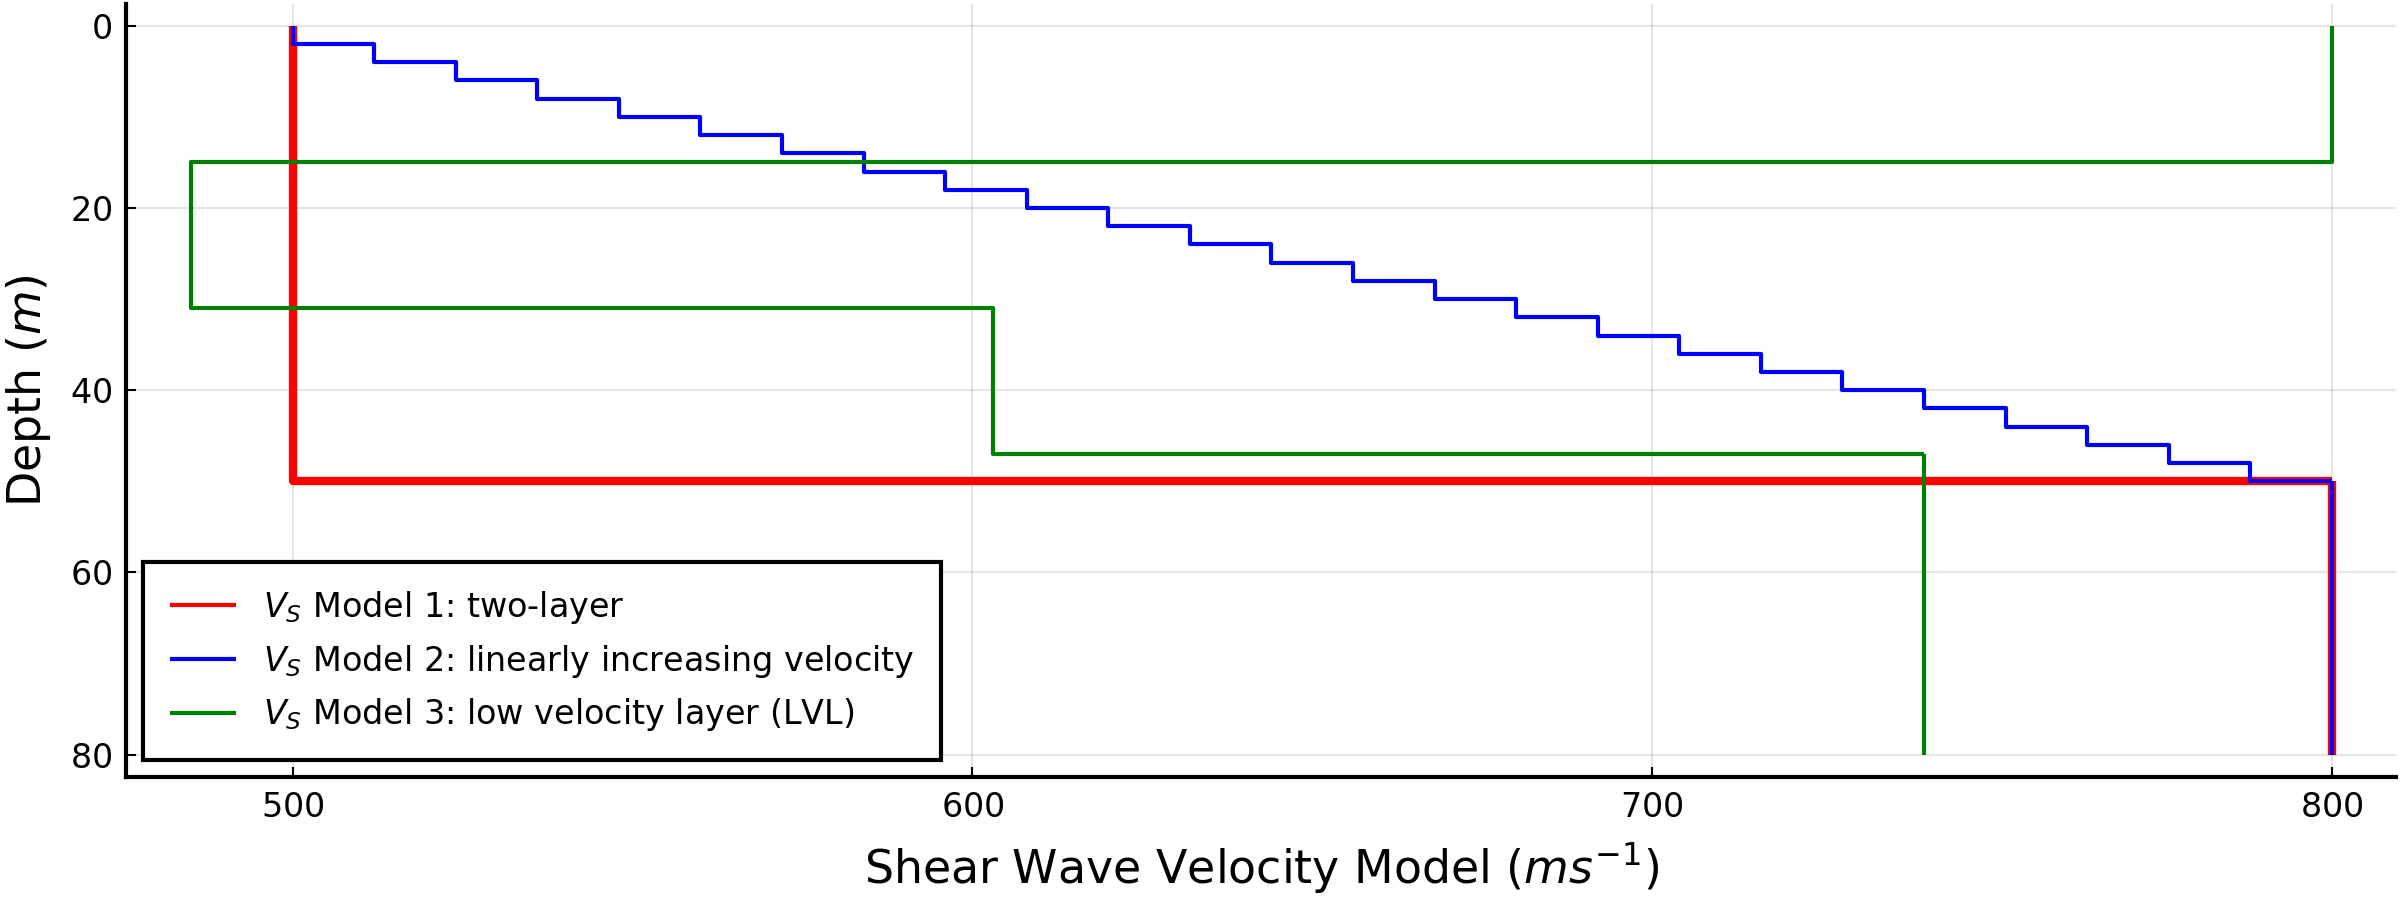

In [40]:
begin
    plot(Vs1,depth1, linetype=:steppre, color="red", label=L"$V_S$ Model 1: two-layer",legend=:bottomleft,
        xlabel=L"Shear Wave Velocity Model ($m s^{-1}$)", ylabel=L"Depth ($m$)",linewidth=2.0)
    plot!([Vs1[end],Vs1[end]],[depth1[end],80.0],color="red",label=nothing,linewidth=2.0)
    plot!(Vs2,depth2, linetype=:steppre, color="blue", label=L"$V_S$ Model 2: linearly increasing velocity")
    plot!([Vs2[end],Vs2[end]],[depth2[end],80.0],color="blue",label=nothing)
    plot!(Vs3,depth3, linetype=:steppre, color="green", label=L"$V_S$ Model 3: low velocity layer (LVL)")
    plot!([Vs3[end],Vs3[end]],[maximum(depth3),80.0],color="green",label=nothing)
    plot!(size=(800,300),dpi=300)
    yflip!(true)
end

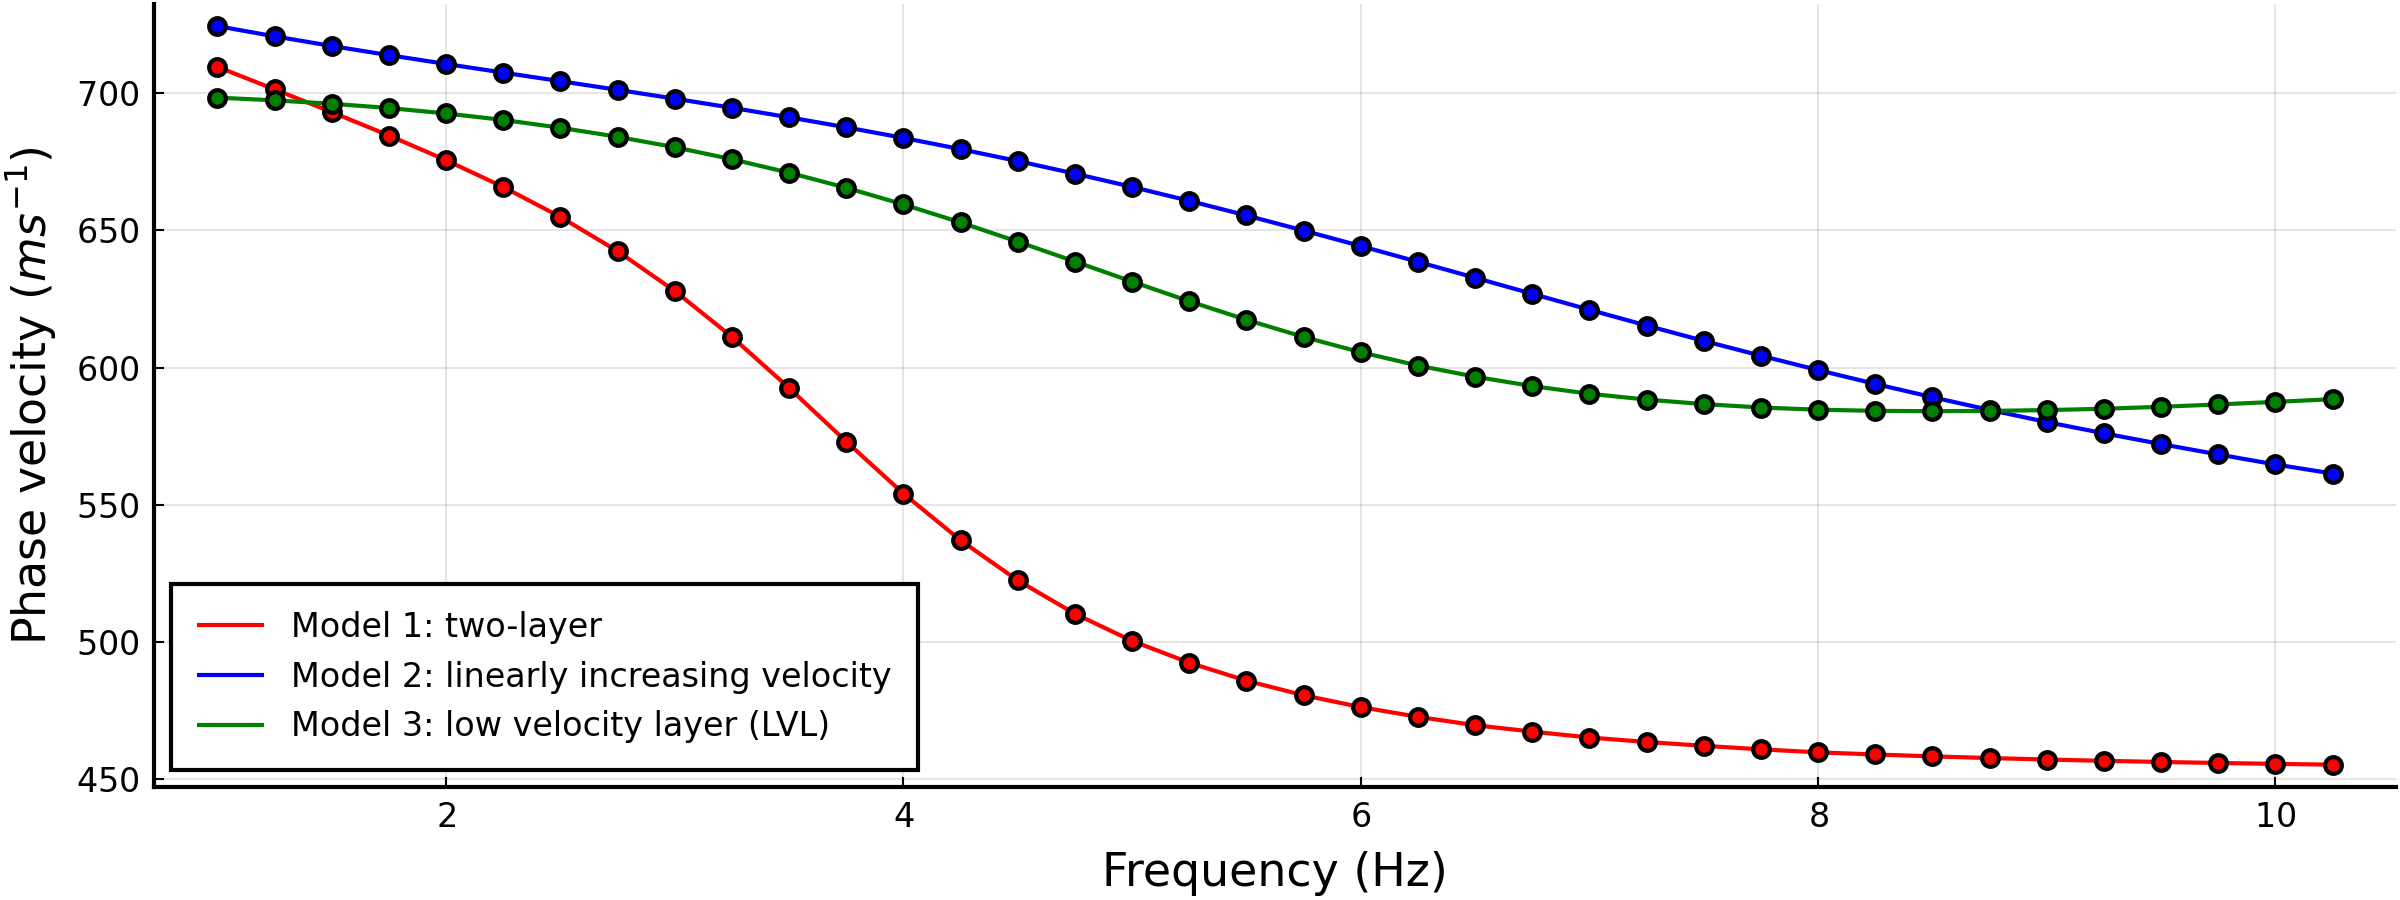

In [34]:
begin
	plot(f1,c1,color="red",label="Model 1: two-layer",xlabel="Frequency (Hz)", ylabel=L"Phase velocity ($m s^{-1}$)", legend=:bottomleft)
	plot!(f1,c1,seriestype=:scatter,color="red",label=nothing)
    plot!(f2,c2,color="blue",label="Model 2: linearly increasing velocity")
    plot!(f2,c2,seriestype=:scatter,color="blue",label=nothing)
    plot!(f3,c3,color="green",label="Model 3: low velocity layer (LVL)")
    plot!(f3,c3,seriestype=:scatter,color="green",label=nothing)
    plot!(size=(800,300),dpi=300)
end

#### Gradient validation and calculation

Gradient calculation using auto-differentiation:

In [48]:
partial_misfit_wrt_Vs(c1[1],Vp1, Vs1, ρ1, d1, f_array, c_array)

2-element Vector{Float64}:
 0.0
 0.0

Gradient calculation using second order Finite Difference:

In [49]:
partial_misfit_wrt_Vs_FD(c1[1],Vp1, Vs1, ρ1, d1, f_array, c_array)

2-element Vector{Float64}:
 -0.0012991002219615022
 -0.00032879004926360256

In [51]:
@benchmark grad_f_Vs = partial_misfit_wrt_Vs(c1[1],Vp1, Vs1, ρ1, d1, f_array, c_array)

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  102.367 ms … 109.514 ms  ┊ GC (min … max): 11.21% … 11.63%
 Time  (median):     103.865 ms               ┊ GC (median):    11.20%
 Time  (mean ± σ):   104.308 ms ±   1.577 ms  ┊ GC (mean ± σ):  11.28% ±  0.44%

        ▁ ▃   █▃  ▁   ▁                                          
  ▄▄▁▇▇▄█▄█▄▇▇██▇▁█▇▁▁█▄▁▄▄▁▁▁▁▁▄▄▁▁▁▁▁▁▁▁▁▄▁▁▄▁▁▁▁▁▁▁▄▄▁▁▁▁▁▁▄ ▁
  102 ms           Histogram: frequency by time          110 ms <

 Memory estimate: 87.69 MiB, allocs estimate: 1696426.

In [52]:
@benchmark grad_f_Vs_FD = partial_misfit_wrt_Vs_FD(c1[1],Vp1, Vs1, ρ1, d1, f_array, c_array)

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  324.839 ms … 352.577 ms  ┊ GC (min … max): 6.07% … 6.17%
 Time  (median):     330.516 ms               ┊ GC (median):    6.29%
 Time  (mean ± σ):   331.282 ms ±   5.986 ms  ┊ GC (mean ± σ):  6.59% ± 0.64%

  ▁▁██        ▃▁▁                                                
  ████▄▁▄▄▁▄▁▁███▇▄▇▁▄▁▁▇▁▁▄▁▄▄▁▄▁▄▁▄▁▇▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  325 ms           Histogram: frequency by time          353 ms <

 Memory estimate: 184.15 MiB, allocs estimate: 6511635.

In [53]:
@benchmark grad_f_Vs = partial_misfit_wrt_Vs(c2[1],Vp2, Vs2, ρ2, d2, f_array, c_array)

BenchmarkTools.Trial: 18 samples with 1 evaluation.
 Range (min … max):  3.398 s …   3.641 s  ┊ GC (min … max): 17.86% … 17.70%
 Time  (median):     3.486 s              ┊ GC (median):    17.79%
 Time  (mean ± σ):   3.499 s ± 75.977 ms  ┊ GC (mean ± σ):  17.73% ±  0.15%

  ▁  ▁ ▁  █  █ ▁   ▁      █  ▁       ▁ ▁ ▁         ▁ ▁    ▁  
  █▁▁█▁█▁▁█▁▁█▁█▁▁▁█▁▁▁▁▁▁█▁▁█▁▁▁▁▁▁▁█▁█▁█▁▁▁▁▁▁▁▁▁█▁█▁▁▁▁█ ▁
  3.4 s          Histogram: frequency by time        3.64 s <

 Memory estimate: 7.93 GiB, allocs estimate: 73634484.

In [54]:
@benchmark grad_f_Vs_FD = partial_misfit_wrt_Vs_FD(c2[1],Vp2, Vs2, ρ2, d2, f_array, c_array)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  36.040 s …   36.571 s  ┊ GC (min … max): 5.39% … 5.42%
 Time  (median):     36.305 s               ┊ GC (median):    5.41%
 Time  (mean ± σ):   36.305 s ± 375.757 ms  ┊ GC (mean ± σ):  5.41% ± 0.02%

  █                                                         █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  36 s            Histogram: frequency by time         36.6 s <

 Memory estimate: 22.70 GiB, allocs estimate: 1272735655.

In [55]:
@benchmark grad_f_Vs = partial_misfit_wrt_Vs(c3[1],Vp3, Vs3, ρ3, d3, f_array, c_array)

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  170.508 ms … 187.948 ms  ┊ GC (min … max): 18.97% … 21.90%
 Time  (median):     176.232 ms               ┊ GC (median):    20.07%
 Time  (mean ± σ):   176.937 ms ±   4.564 ms  ┊ GC (mean ± σ):  19.95% ±  0.79%

   ▃ ▃     █   █   ▃▃ █▃▃ █           █             ▃            
  ▇█▁█▇▇▁▇▇█▇▇▇█▇▁▇██▇███▁█▇▇▁▇▁▁▁▇▁▁▁█▁▇▁▁▇▁▁▁▁▁▁▁▁█▁▁▁▇▁▇▁▁▇▇ ▁
  171 ms           Histogram: frequency by time          188 ms <

 Memory estimate: 241.32 MiB, allocs estimate: 3661894.

In [56]:
@benchmark grad_f_Vs = partial_misfit_wrt_Vs_FD(c3[1],Vp3, Vs3, ρ3, d3, f_array, c_array)

BenchmarkTools.Trial: 50 samples with 1 evaluation.
 Range (min … max):  1.005 s …   1.081 s  ┊ GC (min … max): 7.12% … 6.79%
 Time  (median):     1.032 s              ┊ GC (median):    7.24%
 Time  (mean ± σ):   1.034 s ± 18.976 ms  ┊ GC (mean ± σ):  7.26% ± 0.26%

  ▃   ▃ ▃   ▃ ▃█▃   ▃▃ █ ▃█         ▃   ▃                    
  █▁▇▁█▇█▇▇▁█▁███▁▇▇██▇█▇██▇▁▁▁▁▁▇▇▇█▁▁▁█▇▁▇▁▁▁▇▁▇▁▇▁▁▇▁▁▁▇ ▁
  1.01 s         Histogram: frequency by time        1.08 s <

 Memory estimate: 659.33 MiB, allocs estimate: 28746021.

#### Inversion of the first model

In [66]:
Vs1_init = Vs1.+75.0 # shift the velocity model
_Vs1, misfit1 = dc_inversion(f1[1],c1[1],Vp1,Vs1_init,ρ1,d1,cmin,cmax; maxiter=150,
    isverbose=false,n_linesearch = 100, α=5e-2, iterverbose=1);

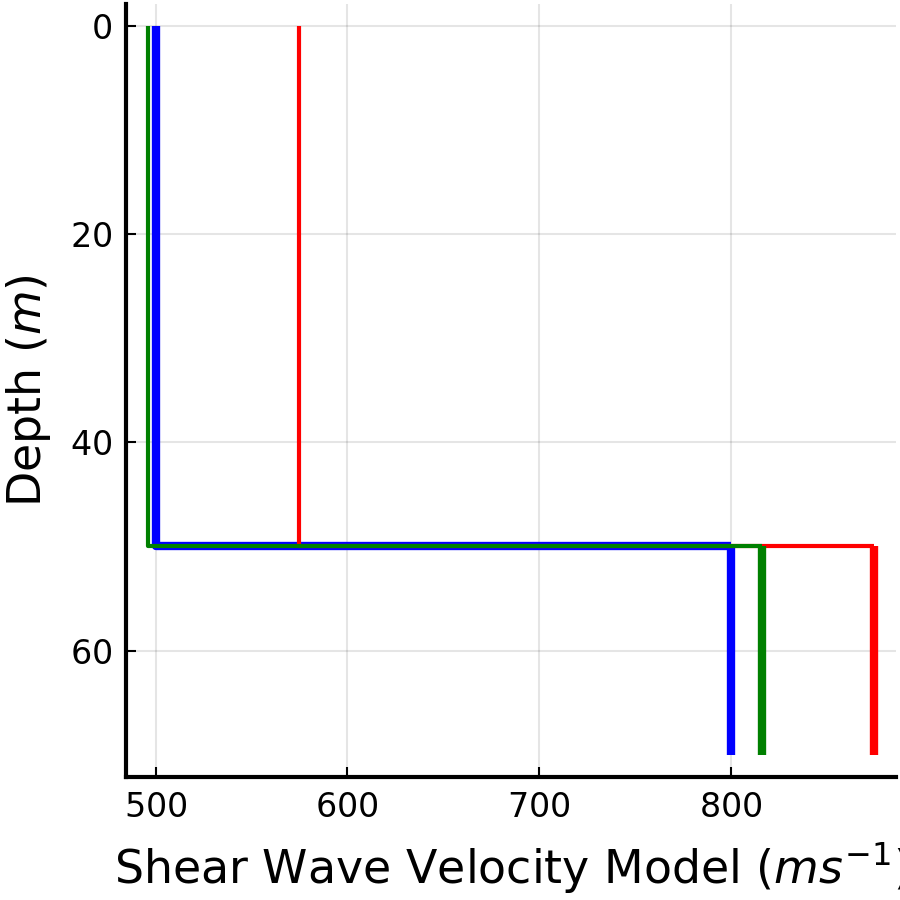

In [79]:
begin
    plot(Vs1,depth1, linetype=:steppre, color="blue", label=L"$V_S$ True model",legend=false,
        xlabel=L"Shear Wave Velocity Model ($m s^{-1}$)", ylabel=L"Depth ($m$)",linewidth=2.0)
    plot!([Vs1[end],Vs1[end]],[depth1[end],70.0],color="blue",label=nothing,linewidth=2.0)
    plot!(size=(300,300),dpi=300)
    plot!(Vs1_init,depth1,linetype=:steppre,label=L"$V_S$ initial model", color="red")
    plot!([Vs1_init[end],Vs1_init[end]],[depth1[end],70.0],color="red",label=nothing,linewidth=2.0)
    plot!(_Vs1,depth1,linetype=:steppre,label=L"$V_S$ reconstructed model", color="green")
    plot!([_Vs1[end],_Vs1[end]],[depth1[end],70.0],color="green",label=nothing,linewidth=2.0)
    yflip!(true)
end

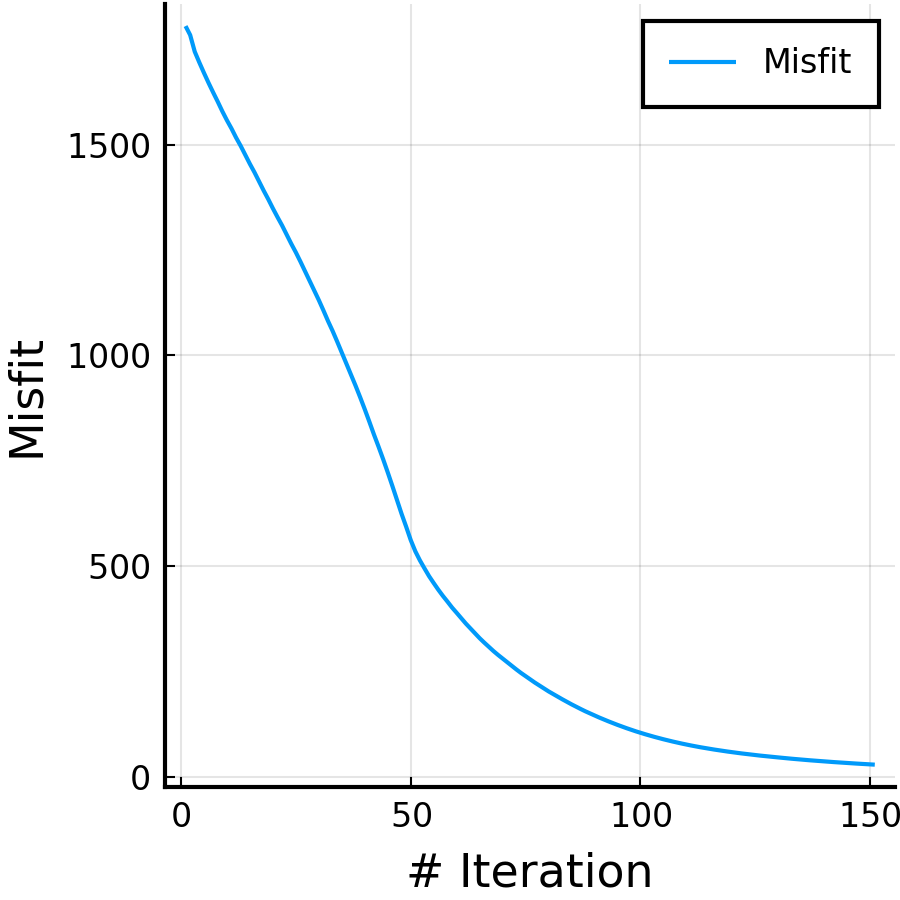

In [74]:
begin
    plot([i for i in range(1,length(misfit1))],misfit1,label="Misfit",xlabel="# Iteration",ylabel="Misfit")
    plot!(size=(300,300),dpi=300)
end

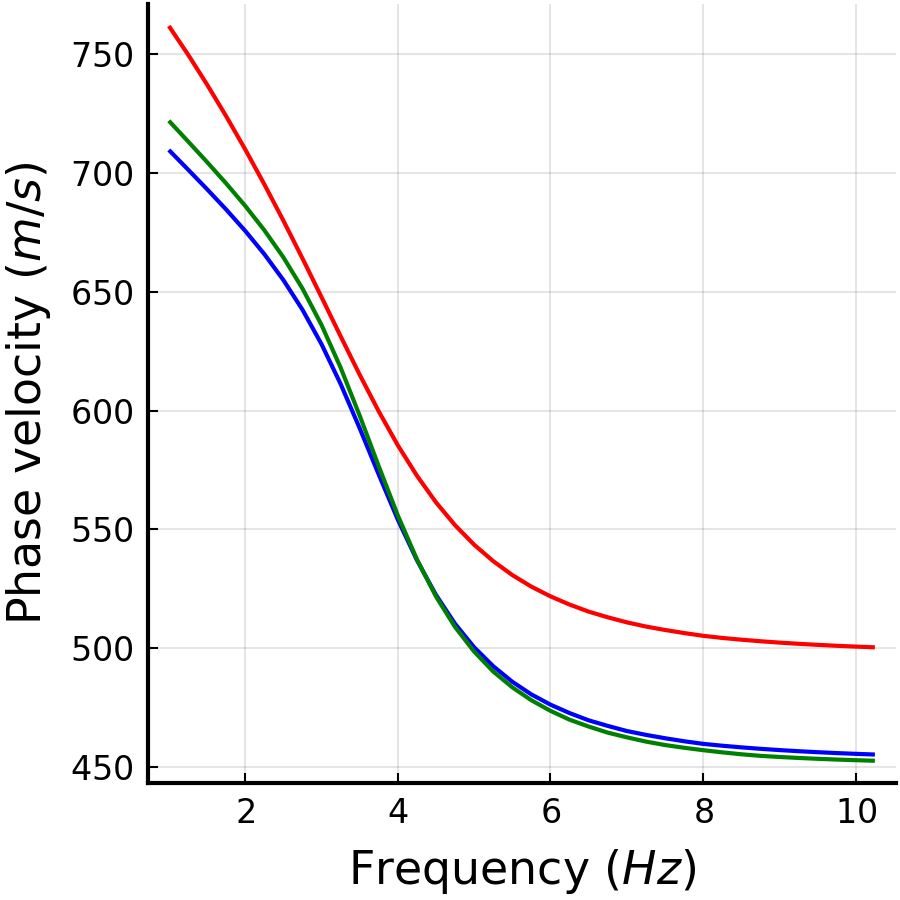

In [81]:
begin
    plot(f1[1],c1[1],label="Observed data from true model",legend=false, color="blue",ylabel=L"Phase velocity ($m/s$)",xlabel=L"Frequency ($Hz$)")
    c_cal = calculate_dc_obs_c(Vp1, Vs1_init, ρ1, d1, f1[1], c_array)
    plot!(f1[1],c_cal,label="Calculated data from initial model",color="red")
    c_cal = calculate_dc_obs_c(Vp1, _Vs1, ρ1, d1, f1[1], c_array)
    plot!(f1[1],c_cal,label="Calculated data from reconstructed model",color="green")
    plot!(size=(300,300),dpi=300)
end

#### Inversion of the second model

In [106]:
Vs2_init = Vs2.+50.0
_Vs2, misfit2 = dc_inversion(f2[1],c2[1],Vp2,Vs2_init,ρ2,d2,cmin,cmax; maxiter=150,
    isverbose=false,n_linesearch = 100, α=1e1, iterverbose=1);

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 38 and 19

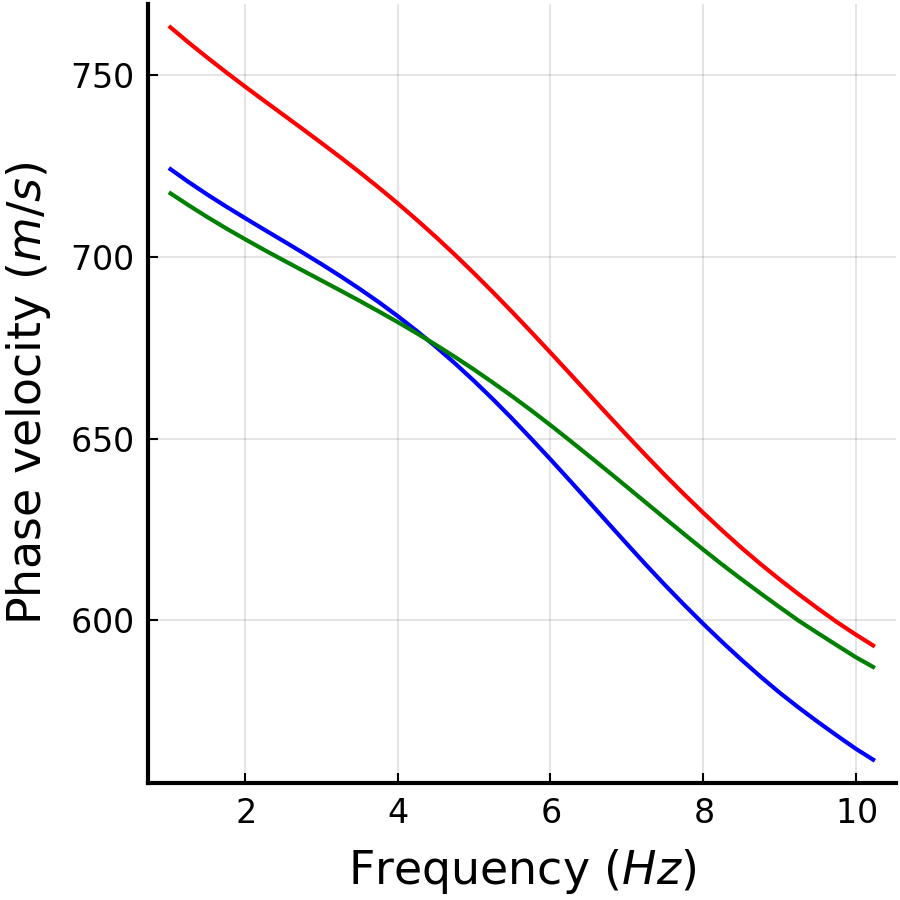

In [ ]:
begin
    plot(f2[1],c2[1],label="Observed data from true model", color="blue",ylabel=L"Phase velocity ($m/s$)",xlabel=L"Frequency ($Hz$)",legend=false)
    c_cal = calculate_dc_obs_c(Vp2, Vs2_init, ρ2, d2, f2[1], c_array)
    plot!(f2[1],c_cal,label="Calculated data from initial model",color="red")
    c_cal = calculate_dc_obs_c(Vp2, _Vs2, ρ2, d2, f2[1], c_array)
    plot!(f2[1],c_cal,label="Calculated data from reconstructed model",color="green")
    plot!(size=(300,300),dpi=300)
end

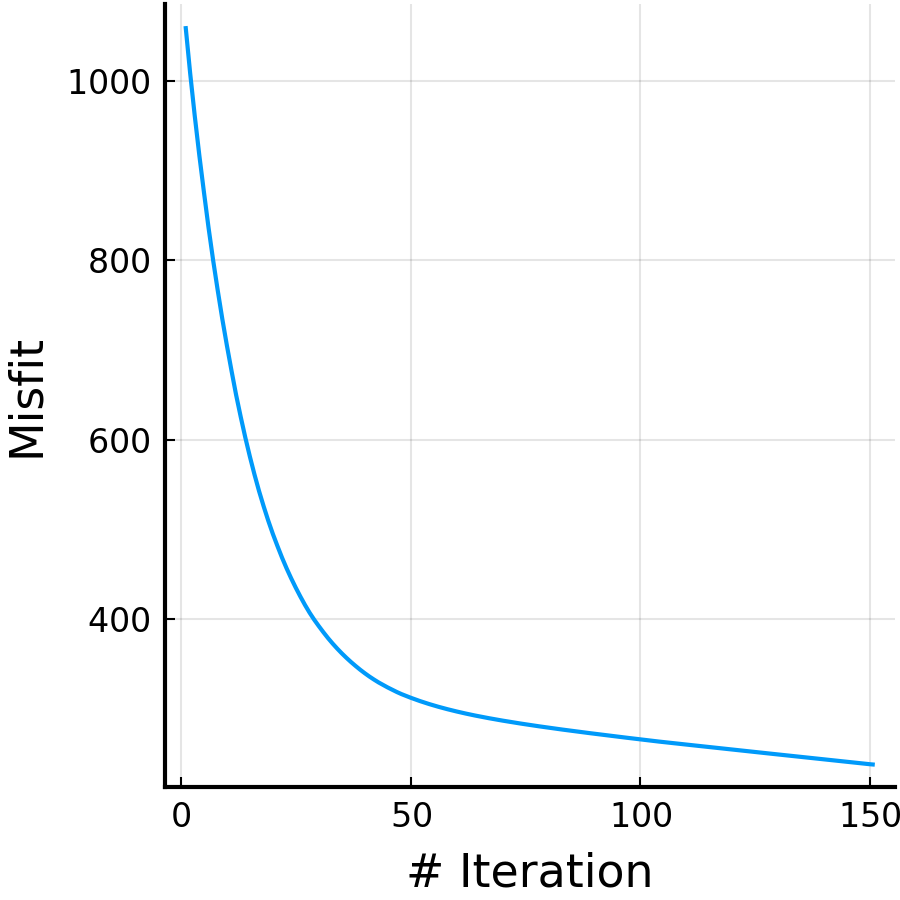

In [ ]:
begin
    plot([i for i in range(1,length(misfit2))],misfit2,label="Misfit",xlabel="# Iteration",ylabel="Misfit",legend=false)
    plot!(size=(300,300),dpi=300)
end

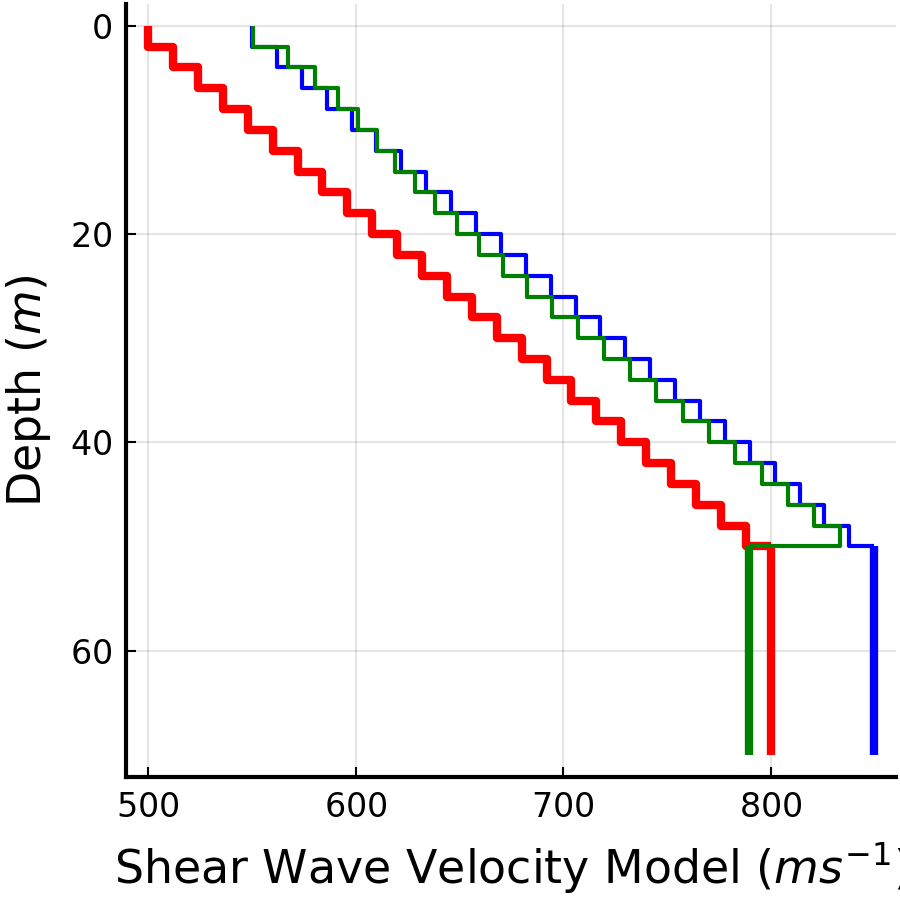

In [ ]:
begin
    plot(Vs2,depth2, linetype=:steppre, color="red", label=L"$V_S$ True model",legend=false,
        xlabel=L"Shear Wave Velocity Model ($m s^{-1}$)", ylabel=L"Depth ($m$)",linewidth=2.0)
    plot!([800.0,800.0],[50.0,70.0],color="red",label=nothing,linewidth=2.0)
    plot!(size=(300,300),dpi=300)
    plot!(Vs2_init,depth2,linetype=:steppre,label=L"$V_S$ initial model", color="blue")
    plot!([Vs2_init[end],Vs2_init[end]],[50.0,70.0],color="blue",label=nothing,linewidth=2.0)
    plot!(_Vs2,depth2,linetype=:steppre,label=L"$V_S$ reconstructed model", color="green")
    plot!([_Vs2[end],_Vs2[end]],[50.0,70.0],color="green",label=nothing,linewidth=2.0)
    yflip!(true)
end

#### Inversion of the third model

In [111]:
Vs3_init = Vs3 .+ 40.0
_Vs3, misfit3 = dc_inversion(f3[1],c3[1],Vp3,Vs3_init,ρ3,d3,cmin,cmax; maxiter=300,
    isverbose=false,n_linesearch = 100, α=1e-2, iterverbose=1);

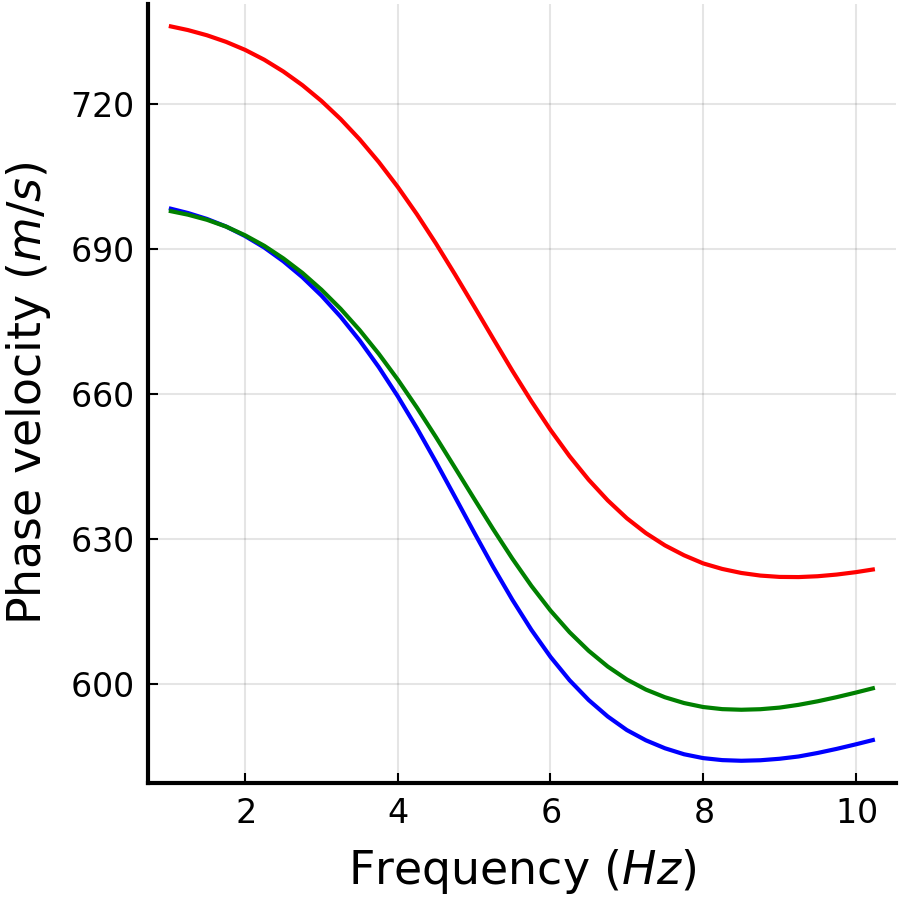

In [112]:
begin
    plot(f3[1],c3[1],label="Observed data from true model", color="blue",ylabel=L"Phase velocity ($m/s$)",xlabel=L"Frequency ($Hz$)",legend=false)
    c_cal = calculate_dc_obs_c(Vp3, Vs3_init, ρ3, d3, f3[1], c_array)
    plot!(f3[1],c_cal,label="Calculated data from initial model",color="red")
    c_cal = calculate_dc_obs_c(Vp3, _Vs3, ρ3, d3, f3[1], c_array)
    plot!(f3[1],c_cal,label="Calculated data from reconstructed model",color="green")
    plot!(size=(300,300),dpi=300)
end

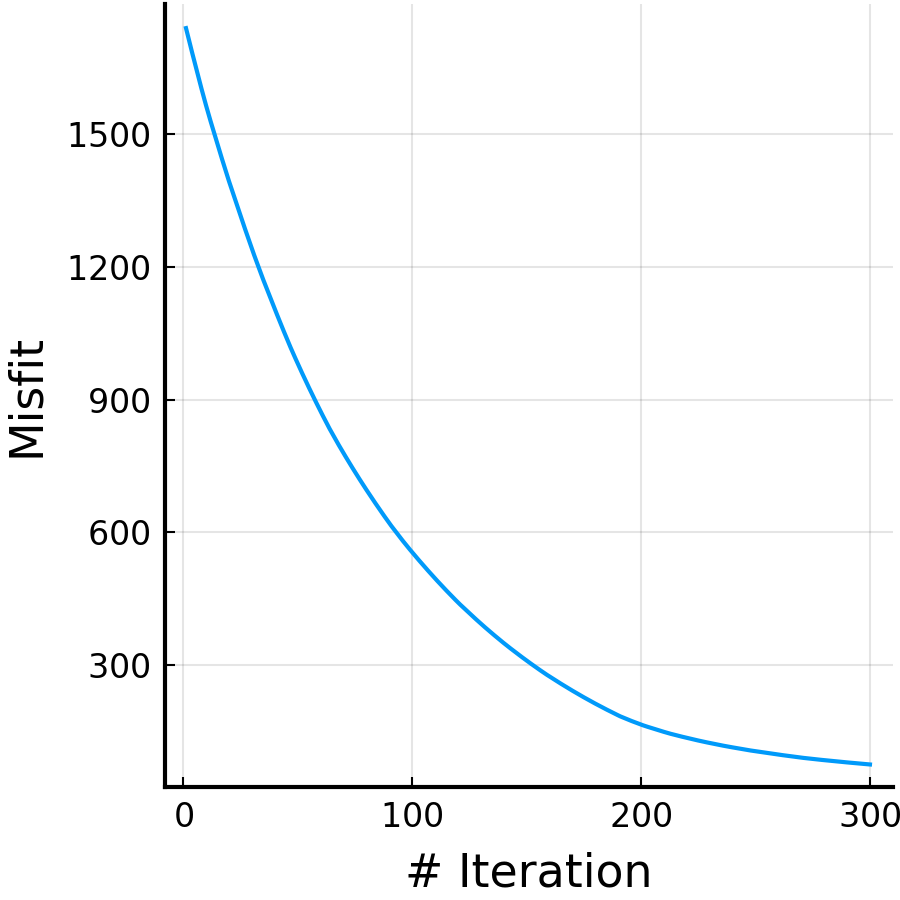

In [113]:
begin
    plot([i for i in range(1,length(misfit3))],misfit3,label="Misfit",xlabel="# Iteration",ylabel="Misfit",legend=false)
    plot!(size=(300,300),dpi=300)
end

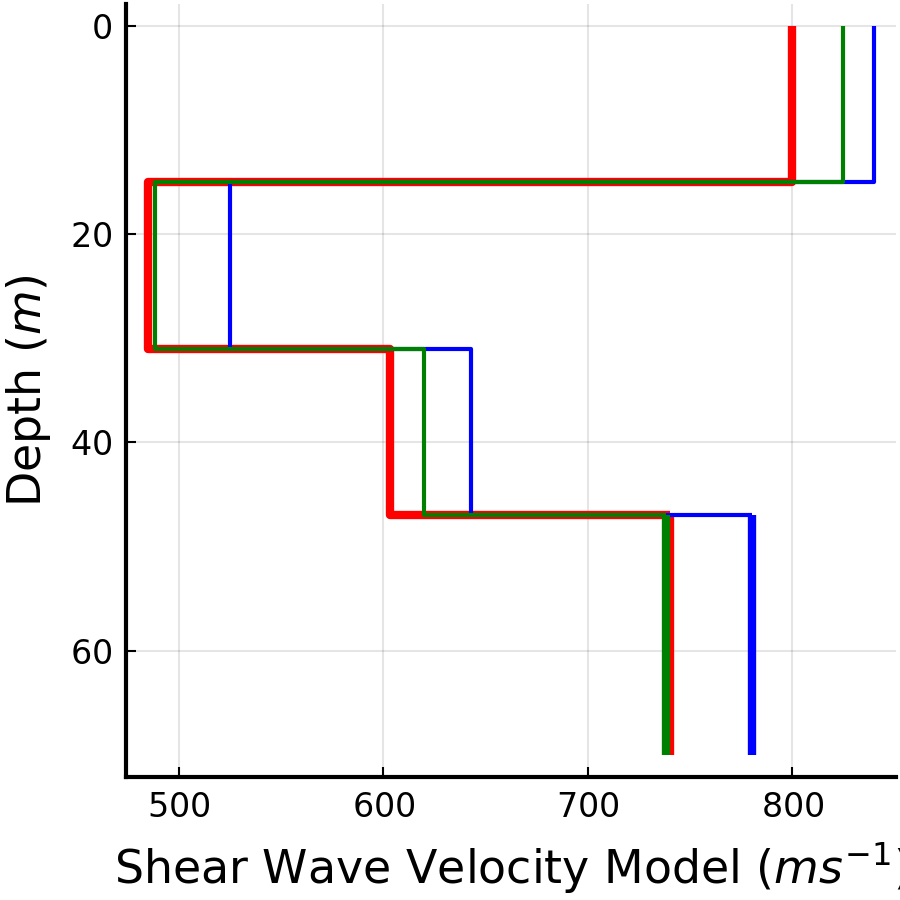

In [114]:
begin
    plot(Vs3,depth3, linetype=:steppre, color="red", label=L"$V_S$ True model",legend=false,
        xlabel=L"Shear Wave Velocity Model ($m s^{-1}$)", ylabel=L"Depth ($m$)",linewidth=2.0)
    plot!([Vs3[end],Vs3[end]],[depth3[end],70.0],color="red",label=nothing,linewidth=2.0)
    plot!(size=(300,300),dpi=300)
    plot!(Vs3_init,depth3,linetype=:steppre,label=L"$V_S$ initial model", color="blue")
    plot!([Vs3_init[end],Vs3_init[end]],[depth3[end],70.0],color="blue",label=nothing,linewidth=2.0)
    plot!(_Vs3,depth3,linetype=:steppre,label=L"$V_S$ reconstructed model", color="green")
    plot!([_Vs3[end],_Vs3[end]],[depth3[end],70.0],color="green",label=nothing,linewidth=2.0)
    yflip!(true)
end